[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# ML - Aprendizaje No Supervisado

##Integrantes
###Armando Nuñez Condori
###Enrique Antonio Calderón Flores
###Kelvin Nava Siñani

##Fashion-MNIST
Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28 píxeles, asociada a una etiqueta de entre 10 clases diferentes. Zalando creó Fashion-MNIST como un reemplazo directo para el conjunto de datos MNIST original, con el objetivo de ser utilizado como una referencia para evaluar algoritmos de aprendizaje automático.

El conjunto de datos original MNIST contiene principalmente dígitos escritos a mano y es muy popular en la comunidad de IA/ML/Ciencia de Datos como una referencia para validar algoritmos. Fashion-MNIST conserva el mismo tamaño de imagen y la misma estructura de divisiones entre entrenamiento y prueba que el conjunto de datos MNIST original. Este conjunto de datos permite a los investigadores y practicantes probar sus algoritmos en un conjunto de datos diferente pero con características similares, ya que se dice que si un algoritmo no funciona bien en MNIST, es probable que tampoco funcione bien en otros conjuntos de datos.

Labels

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot


# Importación de Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/laboratorios/fashion-mnist_train.csv')

: 

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/laboratorios/fashion-mnist_test.csv')

## Preprocesado de datos
*En este caso, al tener todas las columnas con un valor numérico correspondiente a la cantidad de "blanco" de cada pixel (de 0 a 255, 0=negro y 255=blanco), no es necesario realizar un preprocesamiento, ya que no hay valores nulos, todos los valores son necesarios y las salidas (label) ya estan en un valor numérico.*

In [ ]:
print("----------------------")
frec = df_train['label'].value_counts()
print("Frecuencia de valores en la columna 'Label':")
print(frec)
print("----------------------")

----------------------
Frecuencia de valores en la columna 'Label':
label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64
----------------------


Gracias a la ejecución del codigo anterior, se puede ver que cada categoría cuenta con la misma cantidad de ejemplos.

### Separación de Salidas (labels) de características
Ya teniendo el entrenamiento y la prueba separados, en este caso solamente necesitamos separar la salida de las características.

In [ ]:
y_train = df_train['label']
X_train = df_train.drop(columns=['label'])

y_test = df_test['label']
X_test = df_test.drop(columns=['label'])

Verificamos las proporciones de los valores de la salida ('label') y vemos que en este dataset son exactamente iguales. (todos tienen la misma proporción)

In [ ]:
# Verificar la proporción de clases en los conjuntos de entrenamiento y prueba
print("Proporción de clases en y_train:")
print(y_train.value_counts(normalize=True))

print("\nProporción de clases en y_test:")
print(y_test.value_counts(normalize=True))

Proporción de clases en y_train:
label
2    0.1
9    0.1
6    0.1
0    0.1
3    0.1
4    0.1
5    0.1
8    0.1
7    0.1
1    0.1
Name: proportion, dtype: float64

Proporción de clases en y_test:
label
0    0.1
1    0.1
2    0.1
3    0.1
8    0.1
6    0.1
5    0.1
4    0.1
7    0.1
9    0.1
Name: proportion, dtype: float64


###Normalización de datos
Al trabajar con imágenes donde los píxeles varían de 0 a 255, se puede normalizar dividiendo simplemente entre 255 para escalar los valores al rango de 0 a 1 (en lugar de utilizar la desviación estandar)

In [ ]:
# Normalizar dividiendo entre 255
X_train_n = X_train / 255.0
X_test_n = X_test / 255.0

print(X_train_n)
print('-'*30)
print(X_test_n)

       pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pi

## PRIMER METODO: ALGORITMO KMEANS BASICO
En este metodo se calcula instanciando un objeto de Kmeans, y utilizando el metodo .fit_predict(X)

en y_pred se guarda de cada ejemplo, a que cluster pertenece. Se eligió 10 clusters, ya que los labels originales varían de 0 a 9. Con el metodo .cluster_centers_ podemos ver la ubicacion de los centroides de cada cluster.

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters
k = 10

# Crear el objeto KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Predecir los clusters para los datos normalizados X_train_n
y_pred_test = kmeans.fit_predict(X_test_n)

print(y_pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 4 7 ... 9 3 3]


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calcular el ARI entre las etiquetas reales y las etiquetas predichas por K-Means
ari = adjusted_rand_score(y_test, y_pred_test)
#La función adjusted_rand_score compara estas dos asignaciones de grupos y devuelve un valor que varía entre -1 y 1.
#Un valor cercano a 1 indica una asignación de grupos similar entre las etiquetas reales
#y las predichas, mientras que un valor cercano a 0 o negativo indica una asignación aleatoria.

print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.3434697841665676


Se imprime el resultado del ARI calculado. Esto mostrará cuán similar son las asignaciones de grupos entre las etiquetas reales y las predichas por el modelo K-Means. Un valor más alto indica una mayor similitud entre las asignaciones de grupos.

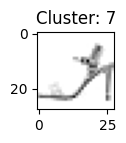

In [ ]:
import matplotlib.pyplot as plt

# Se obtiene la fila específica que deseas imprimir (por ejemplo, fila 520)
fila_a_imprimir = X_test.iloc[520]

# Se obtiene las características de la fila como un array numpy
data = fila_a_imprimir.values

# Reorganizar los datos en una matriz 28x28 para representar la imagen
image_data = data.reshape(28, 28)

# Configurar el tamaño de la figura
plt.figure(figsize=(1, 1))

# Mostrar la imagen
plt.imshow(image_data, cmap='binary')

# Mostrar el número de cluster (valor de predicción)
valor_prediccion = y_pred_test[520]  # Suponiendo que y_pred_test es un array NumPy o una lista
plt.title(f'Cluster: {valor_prediccion}')  # Agregar el número de cluster como título

plt.show()

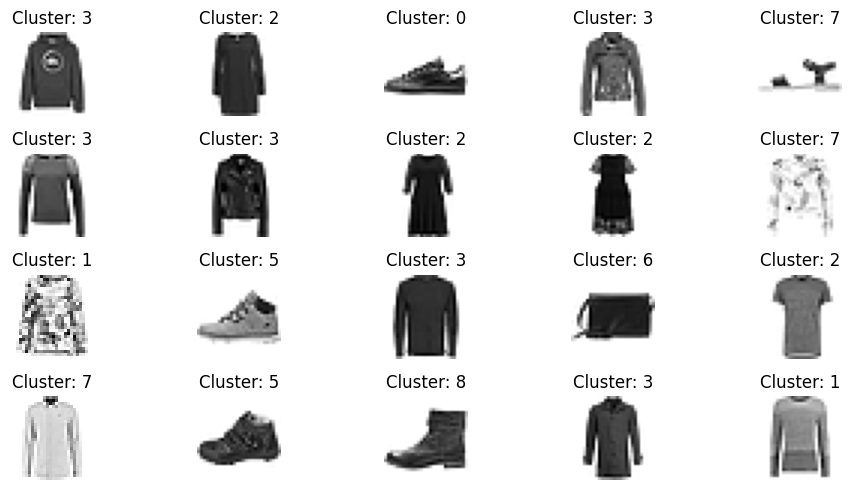

In [ ]:
# Obtener 20 índices aleatorios dentro del rango de predicciones_df2
indices_aleatorios = random.sample(range(len(y_pred_test)), 20)

# Configurar el tamaño de la figura para mostrar varias imágenes
plt.figure(figsize=(10, 5))

# Iterar sobre los índices aleatorios
for i, idx in enumerate(indices_aleatorios):
    # Obtener la fila específica que deseas imprimir
    fila_a_imprimir = X_test.iloc[idx]  # Utilizamos X_test en lugar de X_test2
    # Obtener las características de la fila como un array numpy
    data = fila_a_imprimir.values
    # Reorganizar los datos en una matriz 28x28 para representar la imagen
    image_data = data.reshape(28, 28)

    # Mostrar la imagen en una subfigura
    plt.subplot(4, 5, i + 1)
    plt.imshow(image_data, cmap='binary')
    plt.axis('off')  # Deshabilitar los ejes
    valor_prediccion = y_pred_test[idx]  # Utilizamos y_pred_test en lugar de predicciones_df2
    plt.title(f'Cluster: {valor_prediccion}')  # Añadir el número de cluster como título

plt.tight_layout()  # Ajustar el diseño de las subfiguras
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 9.95263713e-21, -1.01643954e-19,  1.70761842e-18, ...,
         3.46944695e-17, -1.47451495e-17,  4.33680869e-19],
       [ 3.16000695e-06,  1.26400278e-05,  1.54840341e-04, ...,
         1.13760250e-02,  2.69232592e-03,  3.53920779e-04],
       [ 9.31736242e-21,  5.77147978e-05,  1.91370119e-04, ...,
         5.77147978e-04,  1.82257256e-05, -2.00577402e-18],
       ...,
       [ 1.18584613e-20,  3.05418117e-06,  4.58127176e-05, ...,
         1.11569238e-02,  3.38708692e-03,  3.63447560e-04],
       [-4.44692297e-21, -8.80914265e-20,  8.13151629e-19, ...,
         4.13634013e-02,  1.54158215e-02,  1.78180806e-03],
       [ 1.93657710e-05,  2.61437908e-04,  1.20067780e-03, ...,
         4.09682885e-02,  1.50278383e-02,  1.92689421e-03]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


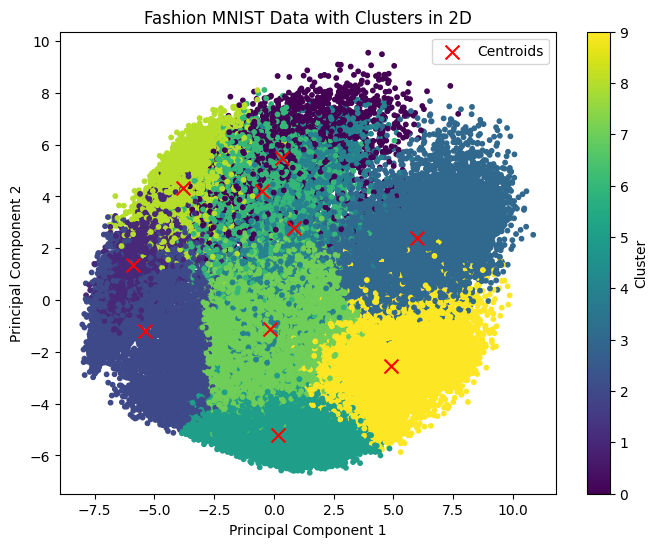

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def plot_data_2d_with_clusters(X, n_clusters=10):
    # Reducción de dimensionalidad a 2D
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    # Ajustar el modelo de clustering (KMeans)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Obtener las etiquetas de cluster asignadas a cada punto
    cluster_labels = kmeans.labels_

    # Dibujar los puntos de datos con colores según el cluster al que pertenecen
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.colorbar(label='Cluster')

    # Dibujar los centroides
    centroids_2d = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', c='red', s=100, label='Centroids')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Fashion MNIST Data with Clusters in 2D')
    plt.legend()

# Suponiendo que X_train_n es tu conjunto de datos de entrenamiento
plot_data_2d_with_clusters(X_train_n)
plt.show()


# SOFT CLUSTERING
En lugar de asignar un grupo a cada muestra (hard clustering) se le puede asignar una puntuación (soft clustering) en función de su distancia al centroide. El valor mas pequeño indica a que centroide se encuentra más cercano.

In [ ]:
# Importa la función make_blobs del módulo sklearn.datasets
from sklearn.datasets import make_blobs

# Define los centros de los clústeres en un arreglo numpy bidimensional
blob_centers = np.array(
    [[ 2.5,  1.3],     # Centro del primer clúster
     [ 4.4,  0.3],     # Centro del segundo clúster
     [ -0.2,  7.3],    # Centro del tercer clúster
     [ -1.5,  3],      # Centro del cuarto clúster
     [ 5.7,  -2.3]])   # Centro del quinto clúster

# Define las desviaciones estándar para cada clúster
blob_std = np.array([0.4, 0.3, 0.5, 0.7, 0.1])

# Utiliza la función make_blobs para generar los datos de muestra y las etiquetas de clase
# Se generan 3000 muestras en total, distribuidas alrededor de los centros de los clústeres
# La dispersión de los datos dentro de cada clúster está determinada por las desviaciones estándar
# El argumento random_state=7 asegura que los resultados sean reproducibles
X, y = make_blobs(n_samples=3000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
import matplotlib.pyplot as plt

# Define la función plot_clusters que toma dos argumentos: X (los datos de muestra) y opcionalmente y (las etiquetas de clase)
def plot_clusters(X, y=None):
    # Crea un gráfico de dispersión donde se muestra la primera columna de X en el eje x y la segunda columna de X en el eje y
    # Los colores de los puntos están determinados por las etiquetas de clase y
    # El tamaño de los puntos se establece en 1 (s=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)

    # Establece la etiqueta del eje x como "$x_1$" y la del eje y como "$x_2$"
    # Con fontsize=14 se establece el tamaño de la fuente de las etiquetas de los ejes
    # Con rotation=0 se establece la rotación de la etiqueta del eje y a 0 grados (horizontal)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

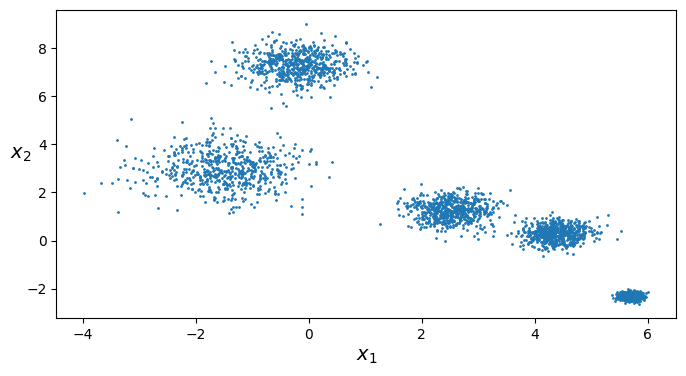

In [ ]:
# Crea una nueva figura de matplotlib con un tamaño de 8 pulgadas de ancho por 4 pulgadas de alto
plt.figure(figsize=(8, 4))

# Llama a la función plot_clusters para graficar los clústeres en el conjunto de datos X
plot_clusters(X)

# Muestra la figura
plt.show()

En Scikit-Learn puedes usar el objeto KMeans, indicando el número de clusters deseado.

In [ ]:
# Define el número de clústeres deseado
k = 5

# Inicializa el modelo K-Means con el número de clústeres especificado y el estado aleatorio para reproducibilidad
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajusta el modelo K-Means a los datos y predice a qué clúster pertenece cada muestra
y_pred = kmeans.fit_predict(X)

# Muestra las etiquetas predichas para cada muestra, es decir, a qué clúster pertenece cada muestra
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 4, ..., 3, 4, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 4.37848322,  0.30443785],
       [-1.51346681,  2.95706275],
       [-0.2083063 ,  7.29662002],
       [ 5.7030017 , -2.30165277],
       [ 2.51414968,  1.26079767]])

In [ ]:
# Define un nuevo conjunto de datos X_new con cuatro muestras
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Utiliza el modelo K-Means ya ajustado para predecir a qué clúster pertenecen las muestras en X_new
# La función predict devuelve las etiquetas de clúster para cada muestra en X_new
kmeans.predict(X_new)

array([1, 4, 1, 1], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

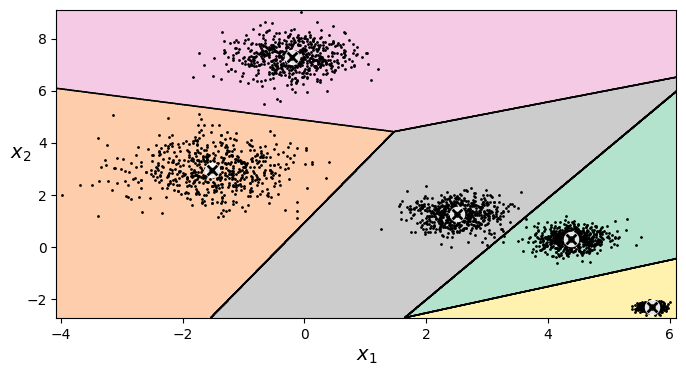

In [ ]:
# Crea una nueva figura de Matplotlib con un tamaño de 8 pulgadas de ancho por 4 pulgadas de alto
plt.figure(figsize=(8, 4))

# Llama a la función plot_decision_boundaries para trazar los límites de decisión del modelo K-Means en el conjunto de datos X
plot_decision_boundaries(kmeans, X)

# Muestra la figura
plt.show()

En lugar de asignar un grupo a cada muestra (hard clustering) se le puede asignar una puntuación (soft clustering) en función de su distancia al centroide.

In [ ]:
# Calcula las distancias de las muestras en X_new a cada uno de los centroides de los clústeres
# La función transform devuelve una matriz donde cada fila representa una muestra en X_new
# y cada columna representa la distancia de esa muestra a cada uno de los centroides de los clústeres
kmeans.transform(X_new)

array([[ 4.69532174,  1.79068447,  5.30071459,  7.14341969,  2.62056648],
       [ 2.18521097,  4.61382181,  6.1925288 ,  5.0803971 ,  0.8845737 ],
       [ 7.85544842,  1.48715317,  5.12391426, 10.19067027,  5.78192627],
       [ 7.69821458,  1.55521294,  5.54987544,  9.93972373,  5.65167843]])

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [ ]:
# Crea tres instancias de objetos KMeans con diferentes configuraciones de iteraciones máximas
# max_iter=1 para kmeans_iter1, max_iter=2 para kmeans_iter2, max_iter=3 para kmeans_iter3
# init="random" especifica que los centroides iniciales se seleccionarán aleatoriamente
# n_init=1 significa que solo se realizará un intento de inicialización
# algorithm="full" indica que se utilizará el algoritmo de K-Means tradicional que itera sobre todos los puntos
# random_state=1 establece la semilla aleatoria para reproducibilidad
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=1)

# Ajusta cada uno de los modelos KMeans a los datos X
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

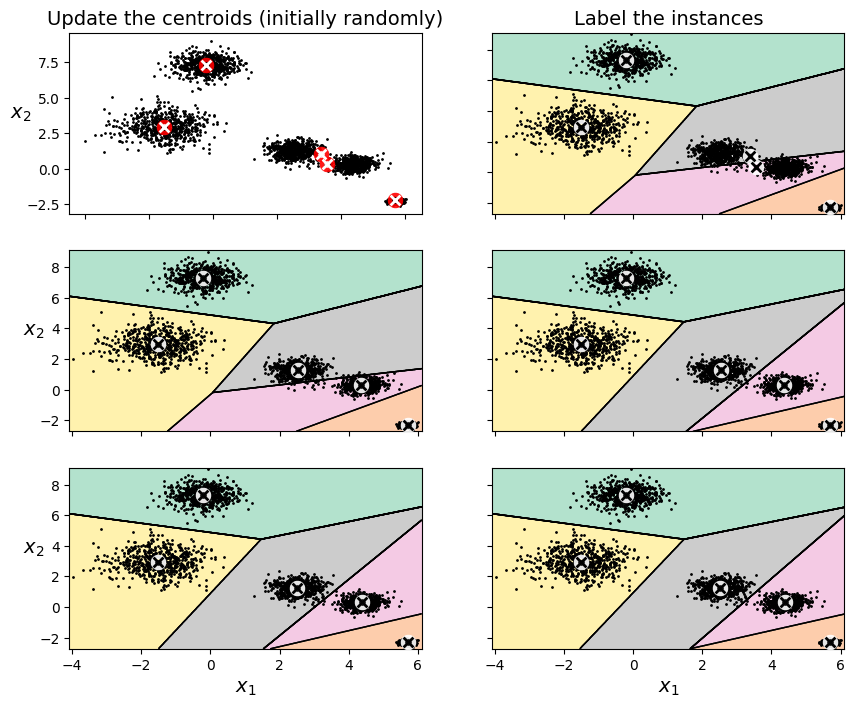

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Ajusta clusterer1 y clusterer2 a los datos X
    clusterer1.fit(X)
    clusterer2.fit(X)

    # Crea una nueva figura de matplotlib con tamaño 10x3.2 pulgadas
    plt.figure(figsize=(10, 3.2))

    # Subtrama izquierda (121)
    plt.subplot(121)
    # Llama a la función plot_decision_boundaries para graficar los límites de decisión de clusterer1
    plot_decision_boundaries(clusterer1, X)
    # Si se proporciona un título para clusterer1, lo muestra en la subtrama
    if title1:
        plt.title(title1, fontsize=14)

    # Subtrama derecha (122)
    plt.subplot(122)
    # Llama a la función plot_decision_boundaries para graficar los límites de decisión de clusterer2
    # Se establece show_ylabels en False para que no se muestren las etiquetas del eje y en esta subtrama
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    # Si se proporciona un título para clusterer2, lo muestra en la subtrama
    if title2:
        plt.title(title2, fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


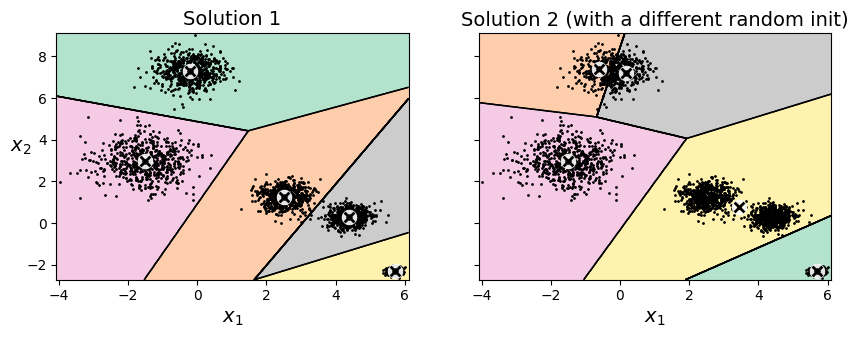

In [ ]:
# Define dos instancias de KMeans con diferentes semillas aleatorias para inicialización aleatoria
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

# Llama a la función plot_clusterer_comparison para comparar las dos soluciones de agrupamiento
# Se proporcionan los dos modelos KMeans, los datos X y los títulos para cada solución
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

# Muestra la figura que contiene la comparación de las soluciones de agrupamiento
plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece Scikit-Learn por defecto.

In [ ]:
# Define una instancia de KMeans con 10 inicializaciones aleatorias diferentes
# init="random" especifica que se utilizará la inicialización aleatoria
# n_init=10 significa que se realizarán 10 inicializaciones aleatorias independientes
# algorithm="full" indica que se utilizará el algoritmo de K-Means tradicional que itera sobre todos los puntos
# random_state=11 establece la semilla aleatoria para reproducibilidad
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)

# Ajusta el modelo KMeans a los datos X
kmeans_rnd_10_inits.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=5, n_init=10,
       random_state=11)

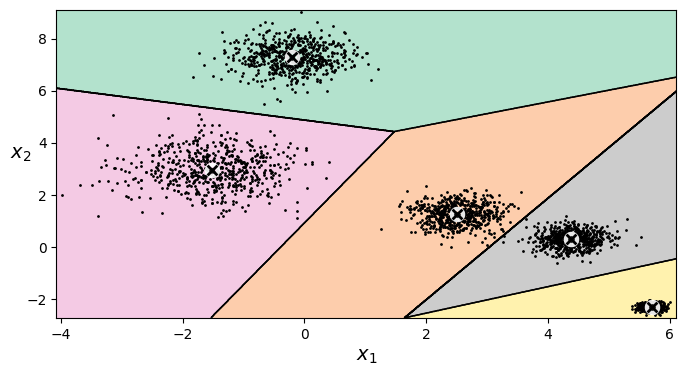

In [ ]:
plt.figure(figsize=(8, 4))
# Llama a la función plot_decision_boundaries para trazar los límites de decisión del modelo KMeans con 10 inicializaciones aleatorias diferentes en el conjunto de datos X
plot_decision_boundaries(kmeans_rnd_10_inits, X)

# Muestra la figura
plt.show()

Otras mejoras al algoritmo de K-Means incluyen: K-Means acelerados (usado por Scikit-Learn por defecto y que evita algunos cálculos de distancias) y mini-batch K-Means (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto MiniBatchKMeans.

In [ ]:
    #Utiliza np.random.choice para seleccionar aleatoriamente índices de muestras del conjunto de datos X
    # La función np.random.choice toma tres argumentos: el tamaño del conjunto de datos, el tamaño del lote y si se permite la repetición de muestras
    # En este caso, replace=False asegura que las muestras seleccionadas no se repitan
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]
     # Selecciona las muestras correspondientes a los índices aleatorios del conjunto de datos X y las devuelve como el lote


In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Definición de parámetros
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

# Mejor modelo MiniBatchKMeans encontrado hasta ahora
best_kmeans = None

# Bucle sobre las inicializaciones aleatorias
for init in range(n_init):
    # Inicializa un objeto MiniBatchKMeans
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)

    # Carga un lote de datos para la inicialización actual
    X_init = load_next_batch(init_size)

    # Ajusta parcialmente el modelo MiniBatchKMeans a este lote
    minibatch_kmeans.partial_fit(X_init)

    # Inicializa la suma de inercia del modelo
    minibatch_kmeans.sum_inertia_ = 0

    # Bucle sobre las iteraciones
    for iteration in range(n_iterations):
        # Carga un lote de datos para esta iteración
        X_batch = load_next_batch(batch_size)

        # Ajusta parcialmente el modelo MiniBatchKMeans a este lote
        minibatch_kmeans.partial_fit(X_batch)

        # Si estamos en las últimas iteraciones, suma la inercia
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Compara la inercia del modelo actual con el mejor encontrado hasta ahora
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        # Actualiza el mejor modelo encontrado hasta ahora
        best_kmeans = minibatch_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
# Calcula la inercia del mejor modelo MiniBatchKMeans encontrado
best_kmeans.inertia_


-1184.485624909312

In [ ]:
from sklearn.metrics import silhouette_score

# Calcula el coeficiente de silhouette para evaluar la calidad del clustering
# silhouette_score toma dos argumentos: los datos X y las etiquetas de cluster asignadas por el algoritmo KMeans
silhouette_score(X, kmeans.labels_)

0.7698222322297206

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

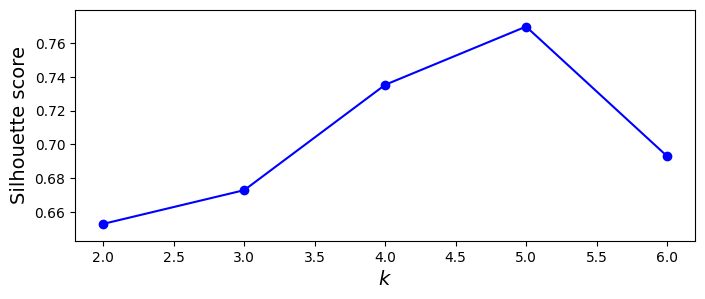

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 7)]  # Rango
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]  # Eliminado [1:]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 7), silhouette_scores, "bo-")  # Rango
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Ajustar los límites del eje x e y para mostrar todos los datos
plt.axis([1.8, 6.2, min(silhouette_scores) - 0.01, max(silhouette_scores) + 0.01])  # Cambio en los límites del eje x

plt.show()



También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

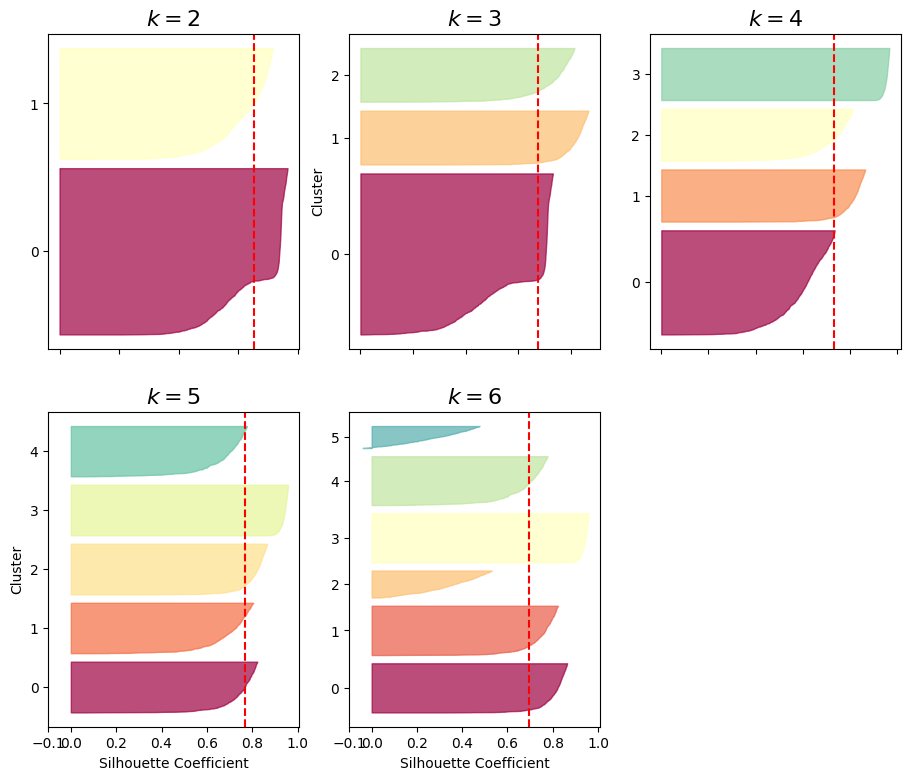

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Crea una figura de matplotlib con un tamaño de 11x9 pulgadas
plt.figure(figsize=(11, 9))

# Ajuste de modelos KMeans para el rango de 2 a 6 clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 7)]

# Iteración sobre el rango de clusters (de 2 a 6)
for k in range(2, 7):
    # Ajuste del subplot para 2 filas y 3 columnas, en la posición k-1
    plt.subplot(2, 3, k - 1)

    # Obtiene las etiquetas de cluster del modelo KMeans correspondiente
    y_pred = kmeans_per_k[k - 2].labels_
    # Calcula los coeficientes de silhouette para cada muestra
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        # Rellena el área entre los coeficientes de silhouette para cada cluster
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Configuración de los ejes y etiquetas
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Dibuja una línea vertical en la posición del coeficiente de silhouette promedio para k clusters
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    # Establece el título del subplot
    plt.title("$k={}$".format(k), fontsize=16)

# Muestra la figura
plt.show()





---



---



### Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

## Inicializacion del modelo de KMeans

In [ ]:
from sklearn.cluster import KMeans

# Número de clusters para el aprendizaje activo
k = 50

# Inicializar el modelo de clustering K-Means
kmeans = KMeans(n_clusters=k, random_state=42)


Una vez instanciado el objeto de KMeans, ajustamos el modelo con .fit_transform.
Lo que obtenemos es la distancia a los centroides encontrados por kmeans de cada uno de los ejemplos, es por ese motivo, que para obtener las distancias minimas a los centros, utilizamos .argmin (mientras más cerca, más representativo).
Ahora teniendo los resultados en idxs de las distancias mas cortas y su respectivo índice de cada k, entonces buscamos ese índice en el conjunto de entrenamiento (ya tenemos los ejemplos en lugar de solo los indices)

In [ ]:
# Calcular las distancias a los centroides y obtener ejemplos representativos
X_train_values = X_train_n.values  # Convertir el DataFrame de entrenamiento normalizado a un array numpy
X_train_dist = kmeans.fit_transform(X_train_values)  # Calcular las distancias a los centroides
idxs = np.argmin(X_train_dist, axis=0)  # Obtener los índices de los ejemplos más cercanos a cada centroide
X_representative_examples = X_train_values[idxs]  # Obtener los ejemplos representativos

# Imprimir la forma de los ejemplos representativos
print("Forma de los ejemplos representativos:", X_representative_examples.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Forma de los ejemplos representativos: (50, 784)


Se realiza la regresion logística (aprendizaje supervisado) pero solo con los 50 ejemplos más representativos del paso anterior, para eso también se obtiene el índice de sus etiquetas correspondientes en y_train_values[idxs]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializar un modelo de regresión logística
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Obtener las etiquetas correspondientes a los ejemplos representativos
y_train_values = y_train.values
y_representative_examples = y_train_values[idxs]

# Entrenar el modelo de regresión logística con los ejemplos representativos y sus etiquetas
log_reg.fit(X_representative_examples, y_representative_examples)


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

Luego con los datos obtenidos verificamos la precision de nuestro modelo utilizando los datos de prueba, utilizando el modelo entrenado que se encuentra en log_reg.
Con accuracy_score obtenemos el porcentaje de precision del modelo entrenado.

In [ ]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba utilizando el modelo entrenado
y_pred_test = log_reg.predict(X_test_n.values)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test)
print("Precisión del modelo en el conjunto de prueba:", accuracy)


Precisión del modelo en el conjunto de prueba: 0.6661


En esta en .predict_proba calculamos las probabilidades de predicion para cada clase en el conjunto de prueba del modelo log_reg.
Luego obtenemos las probabilidades de prediccion mas elevadas y se las guarda en labels.
Luego de eso se las ordena de menor a mayor probabilidad y se almacena en sorted_ixs.
Se toma los de menos probabilidad (de 0 a k=50) y luego se entrena el modelo despues de etiquetar manualemente esos 50 ejemplos con menos probabilidad.
Y se vuelve a comprobar la precision del modelo, en este caso salio 90% que indica que tenemos un modelo bien entrenado.

In [ ]:
# Obtener las probabilidades de predicción para los ejemplos en el conjunto de prueba (ya lo hicimos con y_pred_test)
probas = log_reg.predict_proba(X_test_n.values)

# Seleccionar ejemplos inciertos basados en las probabilidades de predicción
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels) #ordenar de menor a mayor probabilidad
X_lowest = X_test_n.values[sorted_ixs[:k]]
y_lowest = y_test.values[sorted_ixs[:k]]

# Actualizar las etiquetas de los ejemplos inciertos en el conjunto de prueba
y_test_active = y_test.copy()
y_test_active[sorted_ixs[:k]] = y_lowest

# Entrenar un nuevo modelo de regresión logística con las etiquetas actualizadas en el conjunto de prueba
log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg_active.fit(X_test_n, y_test_active)

# Evaluar la precisión del modelo de aprendizaje activo en el conjunto de prueba
accuracy_active = log_reg_active.score(X_test_n, y_test)
print(f"Precisión del modelo de aprendizaje activo (1ra repetición): {accuracy_active:.4f}")

Precisión del modelo de aprendizaje activo (1ra repetición): 0.9063
